# Show your stripes Tokyo edition

I saw the #ShowYourStripe hashtag on Twitter and the work by Ed Hawkins.

More can be found ont the [companion website](https://showyourstripes.info/)

## Work and approach

As always, I tried to applied this to Tokyo as this is where I live. Done in R as I find it much easier to manipulate data and build viz in this language

## Loading Data

In [ ]:
library(tidyverse)
library(lubridate)

temp <- read_csv("tokyo_year.csv") %>%
    gather(Month, Temp, -Year) %>%
    filter(Year != 1875, Year!=2018)

## Point of reference

The mean is based on the first 50 years of data

In [56]:
mean.temp <- temp %>%
    filter(Year %in% c(1876:1926)) %>%
    pull(Temp) %>%
    mean()

mean.temp

[1] 18.55703

## Main Viz

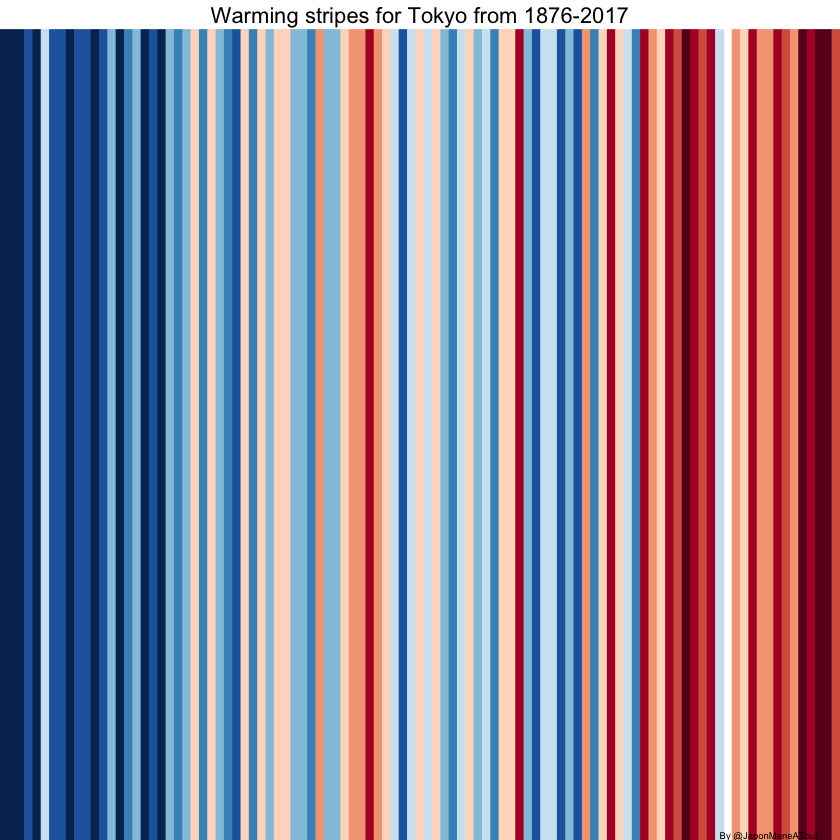

In [89]:
temp %>%
    filter(Year >= 1917) %>%
    group_by(Year) %>%
    summarise(Temp = mean(Temp)) %>%
    mutate(
        adjusted.temp = Temp - mean.temp,
        binned.temp = cut(
            adjusted.temp,
            seq(min(adjusted.temp), max(adjusted.temp), (max(adjusted.temp) - min(adjusted.temp)) /11 ),
            right = F,
            labels = c(1:11)
        )
    ) %>%
    ggplot(aes(Year, adjusted.temp)) +
#     geom_segment(aes(x=Year, xend=Year, y=-Inf, yend=Inf, color=binned.temp)) +
    geom_col(aes(y = 2, fill=binned.temp, color=binned.temp)) +
    coord_cartesian(expand=F) +
    theme_void() +
    scale_color_brewer(palette="RdBu", direction = -1) +
    scale_fill_brewer(palette="RdBu", direction = -1) +
    theme(
        legend.position = "none",
        plot.margin = unit(c(0,0,0,0), "null"),
        plot.title = element_text(hjust=0.5, vjust=1.45),
        plot.caption = element_text(vjust = 3)
    ) +
    labs(
        title = "Warming stripes for Tokyo from 1876-2017"
    ) +
    annotate("text", label= "By @JaponMeneATout", x=2003, y=0, hjust=0, vjust=-0.2, size=2)

ggsave("showYourStripesTokyo.png", width=6, height=3)

## Conclusion

Nothing special to say here, the conclusion is striking and the same whatever the place this viz is done. The hottest year are in the last few years.

## What did I learn or reviewed

- playing with column spacing to get the right effect
- removing the plot margin to get the barcode effect
- binning temperature for easier reading